In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import sys


In [2]:
# Read the xls to dataframe by tabs
xls = pd.ExcelFile("/Users/leono1/Desktop/Data.xls")
df1 = pd.read_excel(xls,'Soc_Dem')
df2 = pd.read_excel(xls,'Products_ActBalance')
df3 = pd.read_excel(xls, 'Inflow_Outflow')
df4 = pd.read_excel(xls, 'Sales_Revenues')

In [3]:
#Sort the dataframe by clients
df1=df1.sort_values(by=['Client'])
df2=df2.sort_values(by=['Client'])
df3=df3.sort_values(by=['Client'])
df4=df4.sort_values(by=['Client'])
left=pd.merge(df1, df2, how='left',on=['Client'] )
right=pd.merge(df3, df4, how='left',on=['Client'] )
pd_new=pd.merge(left,right,how='left',on=['Client'])
Target_right=pd.merge(df3,df4,how='right',on=['Client'])
# 60% of the 1615 clients in the data and it will be used for training models
Target_train=pd.merge(left,Target_right,how='right',on=['Client']) 
# 40% of the 1615 clients in the data and using for prediction
result = pd.concat([pd_new,Target_train],ignore_index=True)
result.drop_duplicates(subset='Client',keep=False,inplace=True)

In [4]:
# # Convert Missing Variables in Mean
# features = list(Target_train.columns)
# target={'Sex','Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'}
# features = [e for e in features if e not in target]
# mean = np.mean(pd_new[features],axis=0)
# for i, v in enumerate(features):
#     Target_train[v]=pd_new[v].replace(np.NaN, mean[i])

In [5]:
# Convert Missing Variables in Mean
features = list(Target_train.columns)
target={'Sex','Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'}
features = [e for e in features if e not in target]
mean = np.mean(pd_new[features],axis=0)
for i, v in enumerate(features):
    Target_train[v]=pd_new[v].replace(np.NaN, mean[i])

In [6]:
# Convert Sex to categrical attributes, which female is 1 and male is 0.
Target_train[['Sex']]=Target_train.Sex.map({'F':1,'M':0})
# # Mark zero for each missing variable or NaN
# Target_train[['Count_CA','Count_SA','Count_MF','Count_OVD','Count_CC','Count_CL',
#        'ActBal_CA','ActBal_SA','ActBal_MF','ActBal_CC','ActBal_CL','ActBal_OVD']]=pd_new[['Count_CA','Count_SA','Count_MF','Count_OVD','Count_CC','Count_CL',
#         'ActBal_CA','ActBal_SA','ActBal_MF','ActBal_CC','ActBal_CL','ActBal_OVD']].replace(np.NaN,0)

In [7]:
# #replace with median and mean 
# # Target_train.dropna(inplace=True)
Target_train['Sex']=Target_train['Sex'].replace(np.NaN, -1)

In [8]:
# Drop unwanted columns
Target_train.drop(["Count_SA","Count_MF","Count_OVD","Count_CC","Count_CL","ActBal_MF","ActBal_SA","ActBal_OVD","ActBal_CC","ActBal_CL"],axis=1,inplace=True)

In [9]:
# Drop columns due to too much missing varibales
print(Target_train.isnull().sum())

Client                          0
Sex                             0
Age                             0
Tenure                          0
Count_CA                        0
ActBal_CA                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDeb_CA              0
TransactionsDebCash_Card        0
TransactionsDebCashless_Card    0
TransactionsDeb_PaymentOrder    0
Sale_MF                         0
Sale_CC                         0
Sale_CL                         0
Revenue_MF                      0
Revenue_CC                      0
Revenue_CL                      0
dtype: int64


In [10]:
#Check which two rows are missing
null_data = Target_train[Target_train.isnull().any(axis=1)]
null_data

,Client,Sex,Age,Tenure,Count_CA,ActBal_CA,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL


In [11]:
Target_train.head(5)

,Client,Sex,Age,Tenure,Count_CA,ActBal_CA,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1,1.0,51,7,1,1333.802857,1678.946429,1318.698214,25.0,23.0,...,30.0,3.0,12.0,9.0,1,0,0,26.972679,0.0,0.0
1,2,0.0,43,152,1,110.768571,708.129643,704.935714,4.0,3.0,...,6.0,2.0,2.0,1.0,0,0,0,0.000000,0.0,0.0
2,3,1.0,17,140,1,482.654643,1607.149643,1607.149643,4.0,4.0,...,3.0,0.0,1.0,1.0,0,0,0,0.000000,0.0,0.0
3,4,1.0,24,153,1,1599.840714,1872.483571,1822.589643,9.0,4.0,...,36.0,6.0,12.0,13.0,0,0,0,0.000000,0.0,0.0
4,5,1.0,58,200,1,5353.483929,4372.773929,2964.290357,23.0,14.0,...,41.0,4.0,17.0,13.0,0,0,0,0.000000,0.0,0.0


In [12]:
# Data Description
Target_train.describe()

,Client,Sex,Age,Tenure,Count_CA,ActBal_CA,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,485.000000,0.464396,42.771930,101.146543,1.082559,2011.103990,1869.779052,1528.114509,5.365544,4.140877,...,13.444937,1.977097,4.959836,4.608069,0.199174,0.249742,0.299278,1.925015,2.712827,3.604220
std,279.870506,0.503112,18.448795,64.350901,0.345268,5167.939822,5662.114879,4104.942495,6.226320,4.798197,...,12.627581,2.780075,7.851831,5.313601,0.399586,0.433087,0.458178,9.943601,17.693433,7.743618
min,1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,243.000000,0.000000,29.000000,44.000000,1.000000,62.470357,250.000714,213.380714,2.000000,2.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,485.000000,0.000000,41.000000,96.000000,1.000000,445.671429,656.431429,635.215000,3.000000,3.000000,...,10.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,727.000000,1.000000,57.000000,151.000000,1.000000,1823.057143,1531.133214,1383.262857,6.000000,4.000000,...,19.000000,3.000000,7.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.642857
max,969.000000,1.000000,97.000000,273.000000,4.000000,74934.956071,107703.804286,66908.951071,63.000000,48.000000,...,79.000000,25.000000,48.000000,34.000000,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357


In [13]:
# Logistic regression without oversapling
from sklearn.model_selection import train_test_split
features = list(Target_train.columns)
print(Target_train.shape)
target={'Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL'}
features = [e for e in features if e not in target]
len(features)
x = Target_train[features]
y = Target_train[['Sale_MF','Sale_CC','Sale_CL']]

(969, 26)


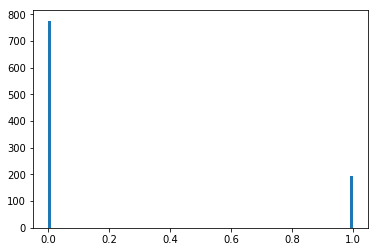

In [14]:
# plot a 100 bin histogram of the "Sale_MF" column
plt.hist(Target_train["Sale_MF"], bins=100)
plt.show()

In [15]:
# # plot a 100 bin histogram of the "Count_SA" column
# plt.hist(Target_train['Count_SA'], bins=100)
# plt.show()

In [16]:
# # plot a 100 bin histogram of the "Count_MF" column
# plt.hist(Target_train['Count_MF'], bins=100)
# plt.show()

In [17]:
# # plot a 100 bin histogram of the "Count_SA" column
# plt.hist(Target_train['Count_OVD'], bins=100)
# plt.show()

In [18]:
# # plot a 100 bin histogram of the "Count_SA" column
# plt.hist(Target_train['Count_CC'], bins=100)
# plt.show()

In [19]:
# # plot a 100 bin histogram of the "Count_CL" column
# plt.hist(Target_train['Count_CL'], bins=100)
# plt.show()

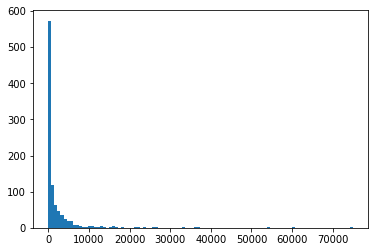

In [20]:
# plot a 100 bin histogram of the "Count_SA" column
plt.hist(Target_train['ActBal_CA'], bins=100)
plt.show()

In [21]:
# # plot a 100 bin histogram of the "ActBal_SA" column
# plt.hist(Target_train['ActBal_SA'], bins=100)
# plt.show()

In [22]:
# # plot a 100 bin histogram of the "ActBal_MF" column
# plt.hist(Target_train['ActBal_MF'], bins=100)
# plt.show()

In [23]:
# # plot a 100 bin histogram of the "ActBal_OVD" column
# plt.hist(Target_train['ActBal_OVD'], bins=100)
# plt.show()

In [24]:
# # plot a 100 bin histogram of the "ActBal_CC" column
# plt.hist(Target_train['ActBal_CC'], bins=100)
# plt.show()

In [25]:
# # plot a 100 bin histogram of the "ActBal_CL" column
# plt.hist(Target_train['ActBal_CL'], bins=100)
# plt.show()

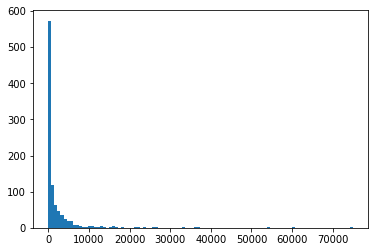

In [26]:
# plot a 100 bin histogram of the "ActBal_CA" column
plt.hist(Target_train['ActBal_CA'], bins=100)
plt.show()

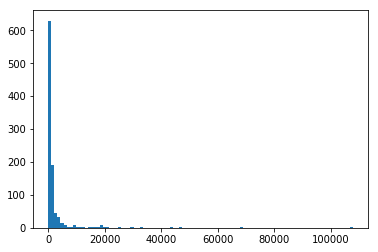

In [27]:
# plot a 100 bin histogram of the "VolumeCred" column
plt.hist(Target_train['VolumeCred'], bins=100)
plt.show()

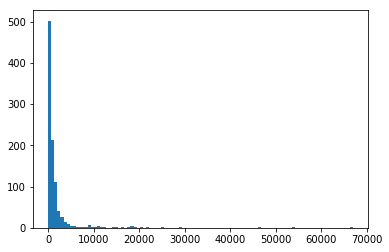

In [28]:
# plot a 100 bin histogram of the "VolumeCred_CA" column
plt.hist(Target_train['VolumeCred_CA'], bins=100)
plt.show()

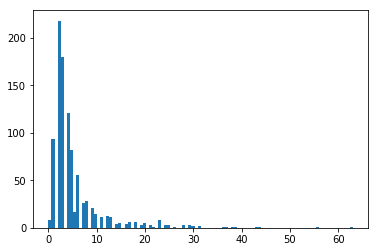

In [29]:
# plot a 100 bin histogram of the "TransactionsCred" column
plt.hist(Target_train['TransactionsCred'], bins=100)
plt.show()

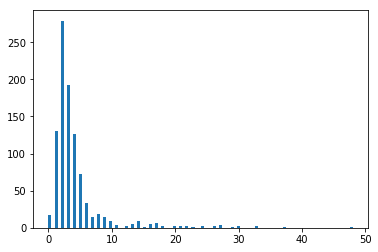

In [30]:
# plot a 100 bin histogram of the "TransactionsCred_CA" column
plt.hist(Target_train['TransactionsCred_CA'], bins=100)
plt.show()

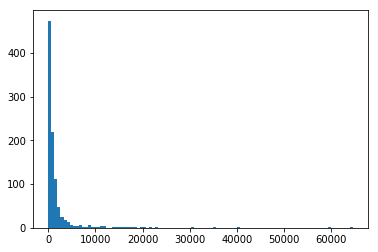

In [31]:
# plot a 100 bin histogram of the "VolumeDeb" column
plt.hist(Target_train['VolumeDeb'], bins=100)
plt.show()

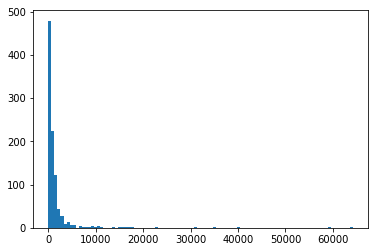

In [32]:
# plot a 100 bin histogram of the "VolumeDeb_CA" column
plt.hist(Target_train['VolumeDeb_CA'], bins=100)
plt.show()

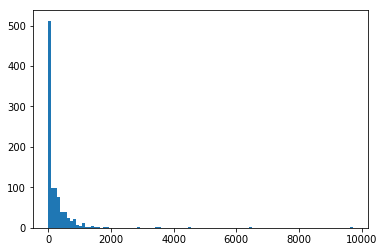

In [33]:
# plot a 100 bin histogram of the "VolumeDebCash_Card" column
plt.hist(Target_train['VolumeDebCash_Card'], bins=100)
plt.show()

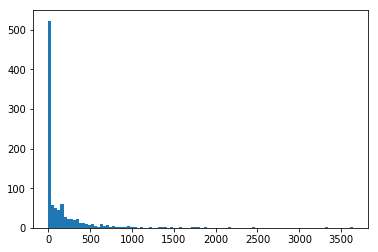

In [34]:
# plot a 100 bin histogram of the "VolumeDebCashless_Card" column
plt.hist(Target_train['VolumeDebCashless_Card'], bins=100)
plt.show()

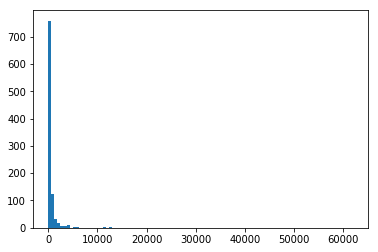

In [35]:
# plot a 100 bin histogram of the "VolumeDeb_PaymentOrder" column
plt.hist(Target_train['VolumeDeb_PaymentOrder'], bins=100)
plt.show()

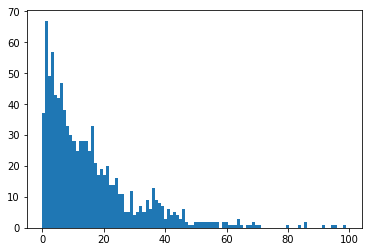

In [36]:
# plot a 100 bin histogram of the "TransactionsDeb" column
plt.hist(Target_train['TransactionsDeb'], bins=100)
plt.show()

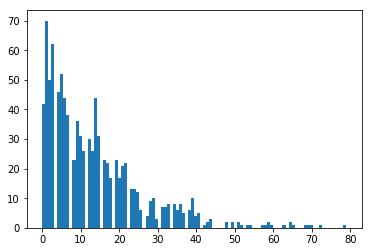

In [37]:
# plot a 100 bin histogram of the "TransactionsDeb_CA" column
plt.hist(Target_train['TransactionsDeb_CA'], bins=100)
plt.show()

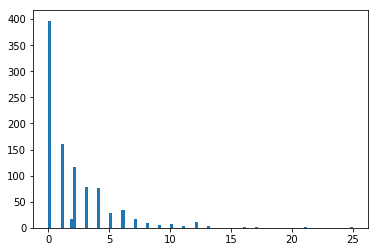

In [38]:
# plot a 100 bin histogram of the "TransactionsDebCash_Card" column
plt.hist(Target_train['TransactionsDebCash_Card'], bins=100)
plt.show()

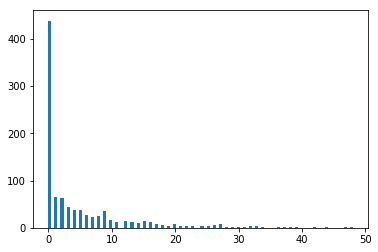

In [39]:
# plot a 100 bin histogram of the "TransactionsDebCashless_Card" column
plt.hist(Target_train['TransactionsDebCashless_Card'], bins=100)
plt.show()

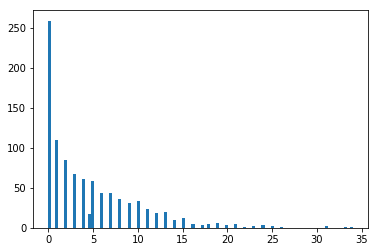

In [40]:
# plot a 100 bin histogram of the "TransactionsDeb_PaymentOrder" column
plt.hist(Target_train['TransactionsDeb_PaymentOrder'], bins=100)
plt.show()

In [41]:
# Use PCA to reduce dimension
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [42]:
# Target_train[['Sex']]=Target_train.Sex.map({'F':1,'M':0})

In [43]:
Target_train.info

<bound method DataFrame.info of      Client  Sex  Age  Tenure  Count_CA     ActBal_CA    VolumeCred  \
0         1  1.0   51       7         1   1333.802857   1678.946429   
1         2  0.0   43     152         1    110.768571    708.129643   
2         3  1.0   17     140         1    482.654643   1607.149643   
3         4  1.0   24     153         1   1599.840714   1872.483571   
4         5  1.0   58     200         1   5353.483929   4372.773929   
5         6  1.0   24      19         1      4.297143    501.131429   
6         7  0.0   55     227         1    879.685000    387.504643   
7         8  1.0   64      30         1      0.000000    649.199286   
8         9  0.0   33     182         1    510.166429    527.175000   
9        10  1.0   29      48         1    253.458929      0.024643   
10       11  0.0   30      40         1    709.902500    451.847857   
11       12  0.0   45     155         1   1075.475000    466.800357   
12       13  1.0   66     132         1    35

In [44]:
# Standardize the feature matrix
X=StandardScaler().fit_transform(Target_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [45]:
# # Create a PCA that will retain 99% of the variance
# pca = PCA(n_components=0.8, whiten=True)
# # Conduct PCA
# X_pca = pca.fit_transform(X)

In [46]:
# # Show results
# print('Original number of features:', X.shape[1])
# print('Reduced number of features:', X_pca.shape[1])

In [47]:
# Cox Box
from scipy import stats
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

In [48]:
def cox_box(columns):
    x = Target_train[columns]
    x = x+0.01
    Target_train[columns]
    sns.kdeplot(x,shade=True)
    normtesttab(x)
    xt, maxlog, interval = stats.boxcox(x, alpha=0.05)
    print("lambda = {:g}".format(maxlog))
    la=maxlog
    normtesttab(xt)
    x=(x-x.mean())/(x.max()-x.min())
    xt=(xt-xt.mean())/(xt.max()-xt.min())
    sns.kdeplot(x, shade=True, label="Raw(normalized)");
    sns.kdeplot(xt, shade=True, label="Transformed (normalized)")
    x = Target_train[columns]
    x = x[x>0]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    prob=stats.boxcox_normplot(x, -22,-15 , plot=ax)
    plt.plot(prob[0], prob[1], color='b')
    ax.axvline(maxlog, color='r')
    ax.axvline(interval[1], color='g', ls='--')
    ax.axvline(interval[0], color='g',ls='--')
    plt.show()
    return xt

In [49]:
def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [50]:
x = Target_train["Count_CA"]
x=x+0.01

In [51]:
xt, maxlog, interval = stats.boxcox(x, alpha=0.05)
print("lambda = {:g}".format(maxlog))

lambda = -19.5419


In [52]:
normtesttab(xt)

    Test_name          Statistic            p-value        
------------------ ----------------- ----------------------
D'Agostino-Pearson 713.6932926192742 1.055530099208317e-155
       Jarque-Bera 6670.906871315282                    0.0


In [53]:
x=(x-x.mean())/(x.max()-x.min())
xt=(xt-xt.mean())/(xt.max()-xt.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


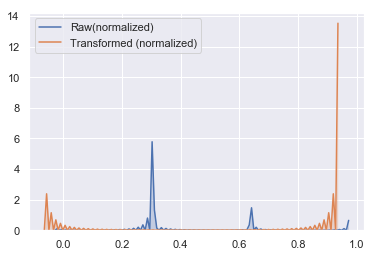

In [54]:
sns.kdeplot(x, shade=True, label="Raw(normalized)");
sns.kdeplot(xt, shade=True, label="Transformed (normalized)")

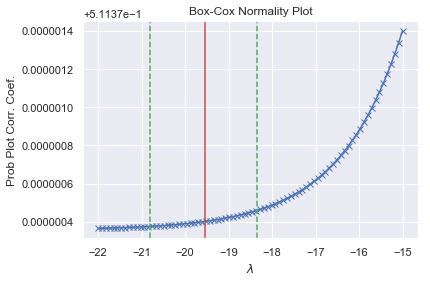

In [55]:
x = Target_train['Count_CA']
x = x[x>0]
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, -22,-15 , plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

In [56]:
x15 = Target_train['ActBal_CA']
x15 = x15+0.01

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


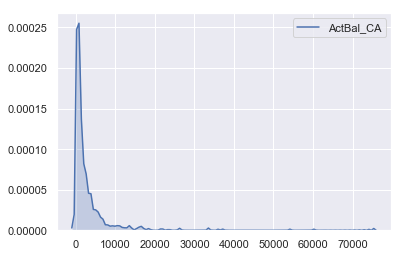

In [57]:
sns.kdeplot(x15,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [58]:
normtesttab(x15)

    Test_name          Statistic              p-value        
------------------ ------------------ -----------------------
D'Agostino-Pearson 1312.2817355948177 1.1006310596460525e-285
       Jarque-Bera 237263.69838858797                     0.0


In [59]:
xt15, maxlog, interval = stats.boxcox(x15, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la = {}
la['ActBal_CA']=maxlog

lambda = 0.162036


In [60]:
normtesttab(xt15)

    Test_name          Statistic            p-value      
------------------ ------------------ -------------------
D'Agostino-Pearson 1.7086392158876953 0.42557264884831747
       Jarque-Bera 1.7847694189098708  0.4096776248350176


In [61]:
x15=(x15-x15.mean())/(x15.max()-x15.min())
xt15=(xt15-xt15.mean())/(xt15.max()-xt15.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


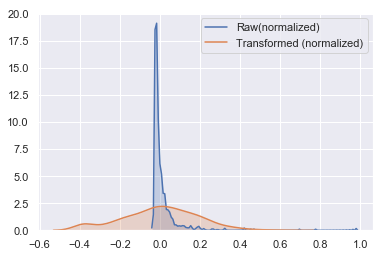

In [62]:
sns.kdeplot(x15, shade=True, label="Raw(normalized)");
sns.kdeplot(xt15, shade=True, label="Transformed (normalized)")

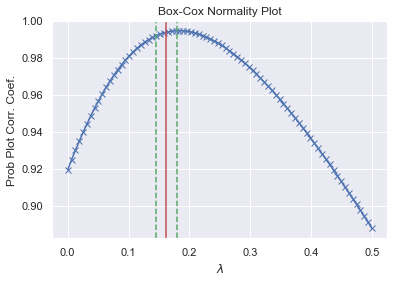

In [63]:
x = Target_train['ActBal_CA']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, 0,0.5 , plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

In [64]:
 # Box Cox for VolumeCred
x1 = Target_train['VolumeCred']
x1 = x1+0.01

In [65]:
# Get values from our "VolumeCred"
transform = np.asarray(Target_train[['VolumeCred']].values)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


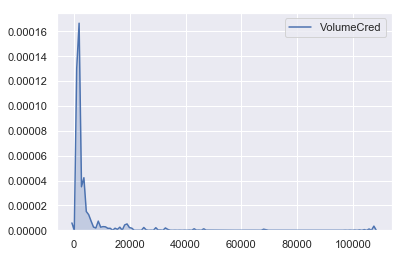

In [66]:
Target_train['VolumeCred']
sns.kdeplot(x1,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [67]:
normtesttab(x1)

    Test_name          Statistic      p-value
------------------ ------------------ -------
D'Agostino-Pearson 1614.6762900037656     0.0
       Jarque-Bera   986164.694514832     0.0


In [68]:
xt1, maxlog, interval = stats.boxcox(x1, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['VolumeCred']=maxlog

lambda = 0.208238


In [69]:
normtesttab(xt1)

    Test_name          Statistic            p-value        
------------------ ----------------- ----------------------
D'Agostino-Pearson 24.98006572888401 3.7639829558905395e-06
       Jarque-Bera 53.67919983759076 2.2065682614424986e-12


In [70]:
x1=(x1-x1.mean())/(x1.max()-x1.min())
xt1=(xt1-xt1.mean())/(xt1.max()-xt1.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


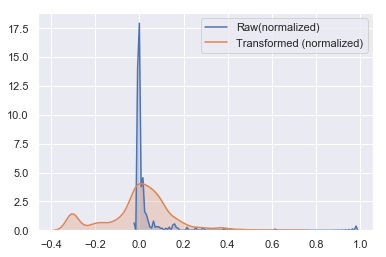

In [71]:
sns.kdeplot(x1, shade=True, label="Raw(normalized)");
sns.kdeplot(xt1, shade=True, label="Transformed (normalized)")

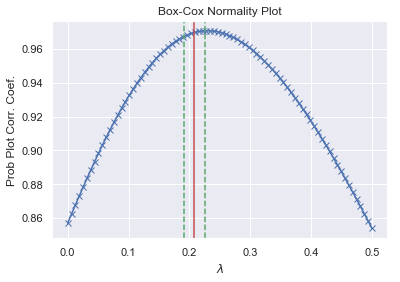

In [72]:
x1 = Target_train['VolumeCred']
x1 = x1+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x1, 0, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


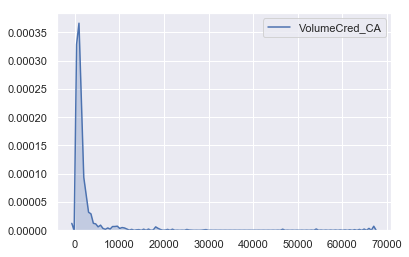

In [73]:
 # Box Cox for VolumeCred_CA
x2 = Target_train['VolumeCred_CA']
x2 = x2+0.01
# Get values from our "VolumeCred_CA"
transform = np.asarray(Target_train[['VolumeCred_CA']].values)
Target_train['VolumeCred_CA']
sns.kdeplot(x2,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [74]:
normtesttab(x2)

    Test_name          Statistic      p-value
------------------ ------------------ -------
D'Agostino-Pearson 1497.7063540129689     0.0
       Jarque-Bera  534883.2958267827     0.0


In [75]:
xt2, maxlog, interval = stats.boxcox(x2, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['VolumeCred_CA']=maxlog

lambda = 0.221237


In [76]:
normtesttab(xt2)

    Test_name          Statistic             p-value        
------------------ ------------------ ----------------------
D'Agostino-Pearson 19.193668309152862  6.794349496801916e-05
       Jarque-Bera 26.993271736640835 1.3755789398661733e-06


In [77]:
x2=(x2-x2.mean())/(x2.max()-x2.min())
xt2=(xt2-xt2.mean())/(xt2.max()-xt2.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


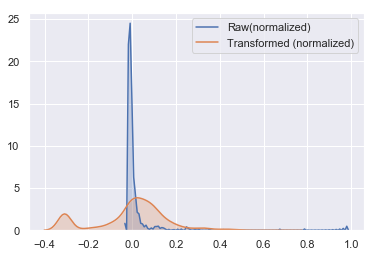

In [78]:
sns.kdeplot(x2, shade=True, label="Raw(normalized)");
sns.kdeplot(xt2, shade=True, label="Transformed (normalized)")

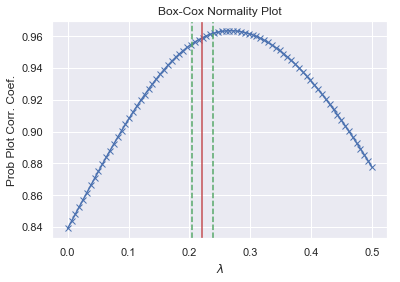

In [79]:
x2 = Target_train['VolumeCred_CA']
x2 = x2+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x2, 0, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


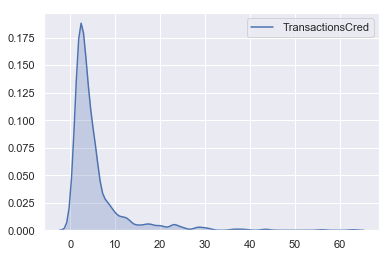

In [80]:
 # Box Cox for TransactionsCred
x3 = Target_train['TransactionsCred']
x3 = x3+0.01
# Get values from our "TransactionsCred"
transform = np.asarray(Target_train[['TransactionsCred']].values)
Target_train['TransactionsCred']
sns.kdeplot(x3,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [81]:
normtesttab(x3)

    Test_name          Statistic             p-value        
------------------ ------------------ ----------------------
D'Agostino-Pearson   793.405604258487 5.178000400761994e-173
       Jarque-Bera 17189.790496230522                    0.0


In [82]:
xt3, maxlog, interval = stats.boxcox(x3, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['TransactionsCred']=maxlog

lambda = 0.154756


In [83]:
normtesttab(xt3)

    Test_name          Statistic            p-value       
------------------ ------------------ --------------------
D'Agostino-Pearson   77.0482827147885 1.85856600161662e-17
       Jarque-Bera 354.69032889152976                  0.0


In [84]:
x3=(x3-x3.mean())/(x3.max()-x3.min())
xt3=(xt3-xt3.mean())/(xt3.max()-xt3.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


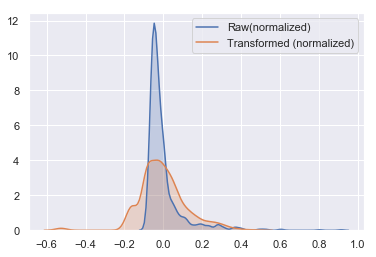

In [85]:
sns.kdeplot(x3, shade=True, label="Raw(normalized)");
sns.kdeplot(xt3, shade=True, label="Transformed (normalized)")

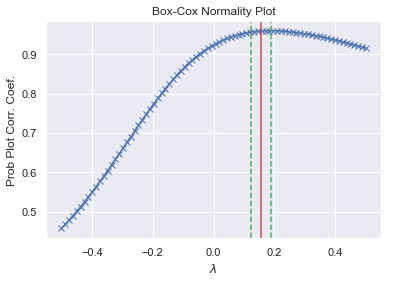

In [86]:
x = Target_train['TransactionsCred']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, -0.5, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


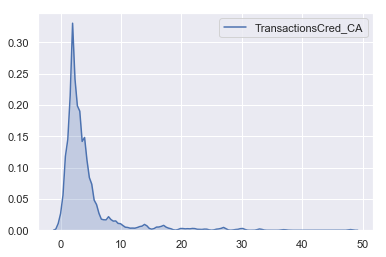

In [87]:
 # Box Cox for TransactionsCred_CA
x4 = Target_train['TransactionsCred_CA']
x4 = x4+0.01
# Get values from our "TransactionsCred_CA"
transform = np.asarray(Target_train[['TransactionsCred_CA']].values)
Target_train['TransactionsCred_CA']
sns.kdeplot(x4,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [88]:
normtesttab(x4)

    Test_name          Statistic            p-value        
------------------ ----------------- ----------------------
D'Agostino-Pearson 807.4870186009327 4.533376683140586e-176
       Jarque-Bera 16768.89409386433                    0.0


In [89]:
x4=x4+0.01
xt4, maxlog, interval = stats.boxcox(x4, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['TransactionsCred_CA']=maxlog

lambda = 0.198716


In [90]:
normtesttab(xt4)

    Test_name          Statistic             p-value        
------------------ ------------------ ----------------------
D'Agostino-Pearson   88.7561099936729 5.3315759134676996e-20
       Jarque-Bera 448.92066240518864                    0.0


In [91]:
x4=(x4-x4.mean())/(x4.max()-x4.min())
xt4=(xt4-xt4.mean())/(xt4.max()-xt4.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


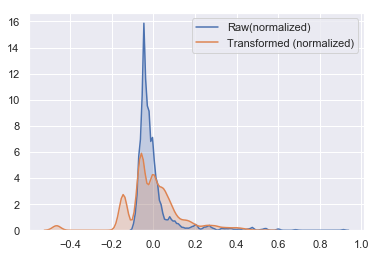

In [92]:
sns.kdeplot(x4, shade=True, label="Raw(normalized)");
sns.kdeplot(xt4, shade=True, label="Transformed (normalized)")

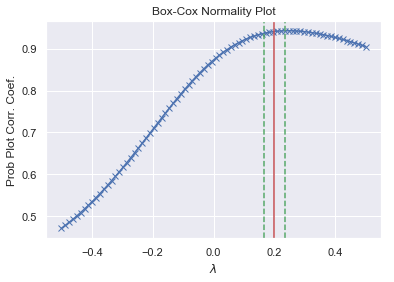

In [93]:
x = Target_train['TransactionsCred_CA']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, -0.5, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


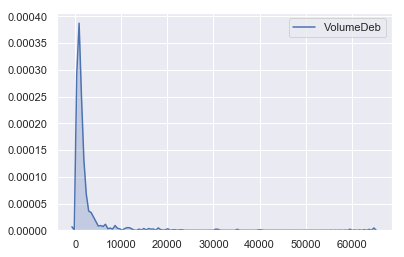

In [94]:
 # Box Cox for VolumeDeb
x5 = Target_train['VolumeDeb']
x5 = x5+0.01
# Get values from our "VolumeDeb"
transform = np.asarray(Target_train[['VolumeDeb']].values)
Target_train['VolumeDeb']
sns.kdeplot(x5,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [95]:
normtesttab(x5)

    Test_name          Statistic             p-value        
------------------ ------------------ ----------------------
D'Agostino-Pearson 1412.1020022453165 2.322449450891396e-307
       Jarque-Bera   358561.704413875                    0.0


In [96]:
x5=x5+0.01
xt5, maxlog, interval = stats.boxcox(x5, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['VolumeDeb']=maxlog

lambda = 0.205699


In [97]:
normtesttab(xt5)

    Test_name          Statistic             p-value        
------------------ ------------------ ----------------------
D'Agostino-Pearson   21.1397998535455 2.5677384686039518e-05
       Jarque-Bera 42.439611892124944  6.086328108168004e-10


In [98]:
x5=(x5-x5.mean())/(x5.max()-x5.min())
xt5=(xt5-xt5.mean())/(xt5.max()-xt5.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


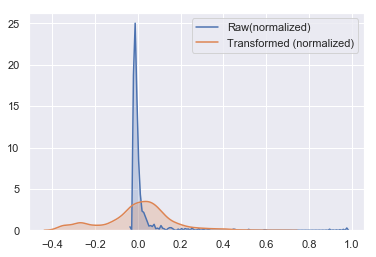

In [99]:
sns.kdeplot(x5, shade=True, label="Raw(normalized)");
sns.kdeplot(xt5, shade=True, label="Transformed (normalized)")

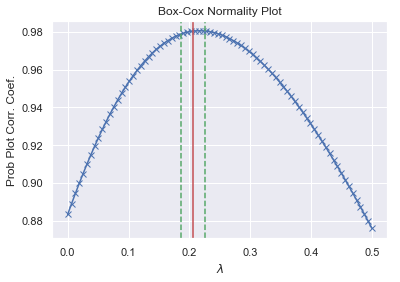

In [100]:
x = Target_train['VolumeDeb']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, 0, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


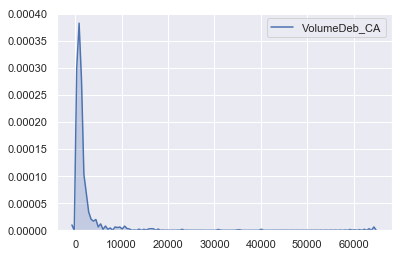

In [101]:
 # Box Cox for VolumeDeb_CA
x6 = Target_train['VolumeDeb_CA']
x6 = x6+0.01
# Get values from our "VolumeDeb_CA"
transform = np.asarray(Target_train[['VolumeDeb_CA']].values)
Target_train['VolumeDeb_CA']
sns.kdeplot(x6,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [102]:
normtesttab(x6)

    Test_name          Statistic     p-value
------------------ ----------------- -------
D'Agostino-Pearson 1559.304573303672     0.0
       Jarque-Bera 670899.8994294755     0.0


In [103]:
x6=x6[x6>0]
xt6, maxlog, interval = stats.boxcox(x6, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['VolumeDeb_CA']=maxlog

lambda = 0.218185


In [104]:
x6=(x6-x6.mean())/(x6.max()-x6.min())
xt6=(xt6-xt6.mean())/(xt6.max()-xt6.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


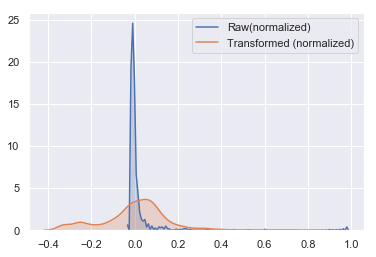

In [105]:
sns.kdeplot(x6, shade=True, label="Raw(normalized)");
sns.kdeplot(xt6, shade=True, label="Transformed (normalized)")

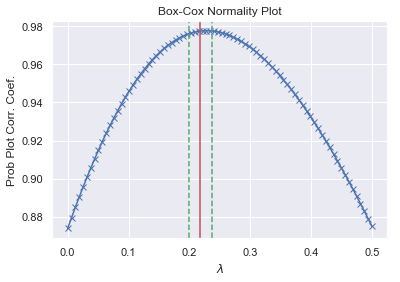

In [106]:
x = Target_train['VolumeDeb_CA']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, 0, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


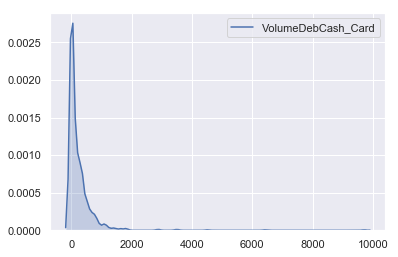

In [107]:
 # Box Cox for VolumeDebCash_Card
x7 = Target_train['VolumeDebCash_Card']
x7 = x7+0.01
# Get values from our "VolumeDebCash_Card"
transform = np.asarray(Target_train[['VolumeDebCash_Card']].values)
Target_train['TransactionsCred']
sns.kdeplot(x7,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [108]:
normtesttab(x7)

    Test_name          Statistic      p-value
------------------ ------------------ -------
D'Agostino-Pearson 1506.4189449274766     0.0
       Jarque-Bera  709521.2384738271     0.0


In [109]:
x7=x7+0.01
xt7, maxlog, interval = stats.boxcox(x7, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['VolumeDebCash_Card']=maxlog

lambda = 0.0683207


In [110]:
normtesttab(xt7)

    Test_name          Statistic           p-value     
------------------ ------------------ -----------------
D'Agostino-Pearson  6.156458610552751 0.046040708554242
       Jarque-Bera 130.82436039541855               0.0


In [111]:
x7=(x7-x7.mean())/(x7.max()-x7.min())
xt7=(xt7-xt7.mean())/(xt7.max()-xt7.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


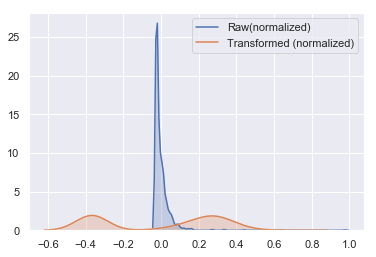

In [112]:
sns.kdeplot(x7, shade=True, label="Raw(normalized)");
sns.kdeplot(xt7, shade=True, label="Transformed (normalized)")

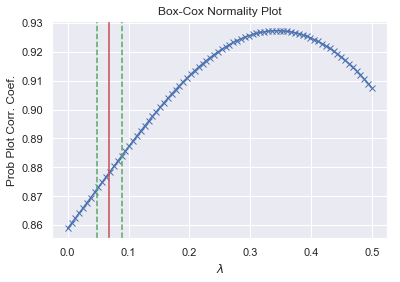

In [113]:
x = Target_train['VolumeDebCash_Card']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, 0, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


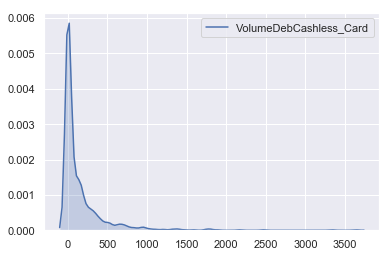

In [114]:
 # Box Cox for VolumeDebCashless_Card
x8 = Target_train['VolumeDebCashless_Card']
x8 = x8+0.01
# Get values from our "VolumeDebCashless_Card"
transform = np.asarray(Target_train[['VolumeDebCashless_Card']].values)
Target_train['VolumeDebCashless_Card']
sns.kdeplot(x8,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [115]:
normtesttab(x8)

    Test_name          Statistic            p-value        
------------------ ----------------- ----------------------
D'Agostino-Pearson 972.2556595931703 7.539907531007249e-212
       Jarque-Bera 48197.04167897688                    0.0


In [116]:
x8=x8+0.01
xt8, maxlog, interval = stats.boxcox(x8, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['VolumeDebCashless_Card']=maxlog

lambda = 0.0164607


In [117]:
normtesttab(xt8)

    Test_name          Statistic           p-value     
------------------ ------------------ -----------------
D'Agostino-Pearson 0.3399542658423829 0.843684108966812
       Jarque-Bera 136.06482000136927               0.0


In [118]:
x8=(x8-x8.mean())/(x8.max()-x8.min())
xt8=(xt8-xt8.mean())/(xt8.max()-xt8.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


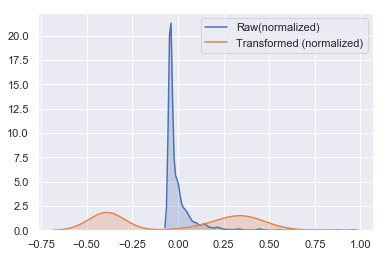

In [119]:
sns.kdeplot(x8, shade=True, label="Raw(normalized)");
sns.kdeplot(xt8, shade=True, label="Transformed (normalized)")

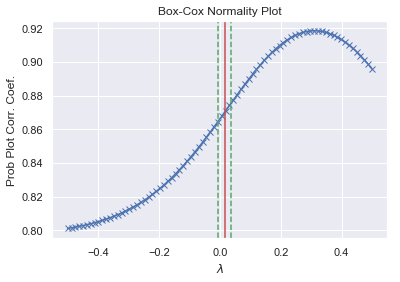

In [120]:
x = Target_train['VolumeDebCashless_Card']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, -0.5, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


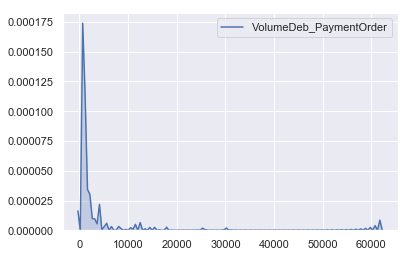

In [121]:
 # Box Cox for VolumeDeb_PaymentOrder
x9 = Target_train['VolumeDeb_PaymentOrder']
x9 = x9+0.01
# Get values from our "VolumeDeb_PaymentOrder"
transform = np.asarray(Target_train[['VolumeDeb_PaymentOrder']].values)
Target_train['VolumeDeb_PaymentOrder']
sns.kdeplot(x9,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [122]:
normtesttab(x9)

    Test_name          Statistic      p-value
------------------ ------------------ -------
D'Agostino-Pearson 1905.6204961774342     0.0
       Jarque-Bera 3221454.5912105846     0.0


In [123]:
x9=x9+0.01
xt9, maxlog, interval = stats.boxcox(x9, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['VolumeDeb_PaymentOrder']=maxlog

lambda = 0.142188


In [124]:
normtesttab(xt9)

    Test_name          Statistic             p-value        
------------------ ------------------ ----------------------
D'Agostino-Pearson  95.94300450586908 1.4663622881919753e-21
       Jarque-Bera 39.152188892607164  3.149272287394922e-09


In [125]:
x9=(x9-x9.mean())/(x9.max()-x9.min())
xt9=(xt9-xt9.mean())/(xt9.max()-xt9.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


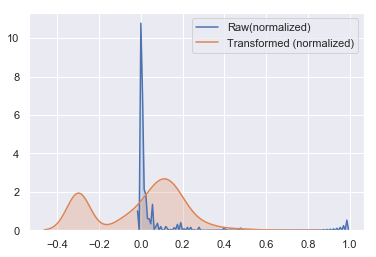

In [126]:
sns.kdeplot(x9, shade=True, label="Raw(normalized)");
sns.kdeplot(xt9, shade=True, label="Transformed (normalized)")

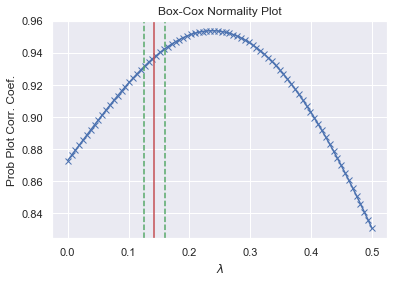

In [127]:
x = Target_train['VolumeDeb_PaymentOrder']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, 0, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


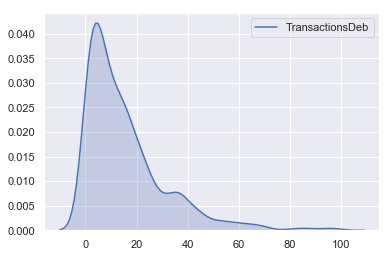

In [128]:
 # Box Cox for TransactionsDeb
x10 = Target_train['TransactionsDeb']
x10 = x10+0.01
# Get values from our "TransactionsDeb"
transform = np.asarray(Target_train[['TransactionsDeb']].values)
Target_train['TransactionsDeb']
sns.kdeplot(x10,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [129]:
normtesttab(x10)

    Test_name          Statistic             p-value        
------------------ ------------------ ----------------------
D'Agostino-Pearson  370.9820762536453 2.7686349632742205e-81
       Jarque-Bera 1341.7791741976819                    0.0


In [130]:
x10=x10+0.01
xt10, maxlog, interval = stats.boxcox(x10, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['TransactionsDeb']=maxlog

lambda = 0.321423


In [131]:
normtesttab(xt10)

    Test_name          Statistic           p-value      
------------------ ------------------ ------------------
D'Agostino-Pearson 1.1175246930339346 0.5719164604018326
       Jarque-Bera 1.1908789203350638 0.5513202293427542


In [132]:
x10=(x10-x10.mean())/(x10.max()-x10.min())
xt10=(xt10-xt10.mean())/(xt10.max()-xt10.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


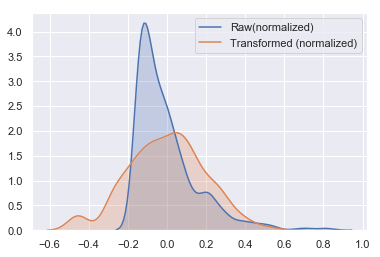

In [133]:
sns.kdeplot(x10, shade=True, label="Raw(normalized)");
sns.kdeplot(xt10, shade=True, label="Transformed (normalized)")

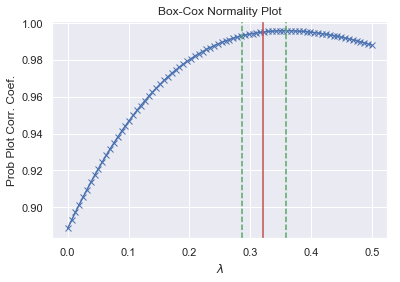

In [134]:
x = Target_train['TransactionsDeb']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, 0, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


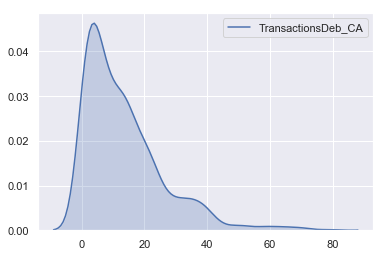

In [135]:
 # Box Cox for TransactionsDeb_CA
x11 = Target_train['TransactionsDeb_CA']
x11 = x11+0.01
# Get values from our "TransactionsDeb_CA"
transform = np.asarray(Target_train[['TransactionsDeb_CA']].values)
Target_train['TransactionsDeb_CA']
sns.kdeplot(x11,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [136]:
normtesttab(x11)

    Test_name          Statistic             p-value       
------------------ ------------------ ---------------------
D'Agostino-Pearson 308.87140864388755 8.500134625384122e-68
       Jarque-Bera  876.6460698791038                   0.0


In [137]:
x11=x11+0.01
xt11, maxlog, interval = stats.boxcox(x11, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['TransactionsDeb_CA']=maxlog

lambda = 0.356124


In [138]:
normtesttab(xt11)

    Test_name          Statistic           p-value      
------------------ ----------------- -------------------
D'Agostino-Pearson 3.295280107968527 0.19250367125448936
       Jarque-Bera 3.130267402605879 0.20906005970224206


In [139]:
x11=(x11-x11.mean())/(x11.max()-x11.min())
xt11=(xt11-xt11.mean())/(xt11.max()-xt11.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


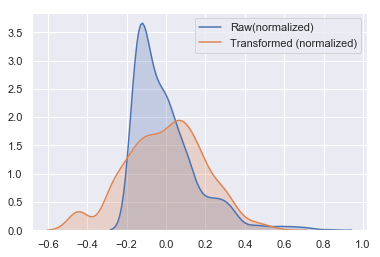

In [140]:
sns.kdeplot(x11, shade=True, label="Raw(normalized)");
sns.kdeplot(xt11, shade=True, label="Transformed (normalized)")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


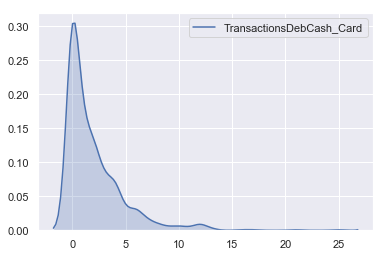

In [141]:
 # Box Cox for TransactionsDebCash_Card
x12 = Target_train['TransactionsDebCash_Card']
x12 = x12+0.01
# Get values from our "TransactionsDebCash_Card"
transform = np.asarray(Target_train[['TransactionsDebCash_Card']].values)
Target_train['TransactionsDebCash_Card']
sns.kdeplot(x12,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

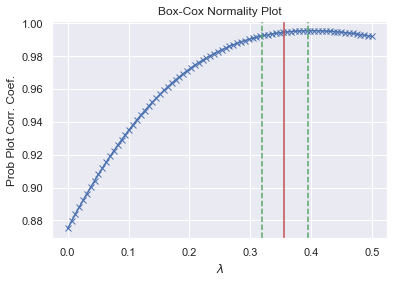

In [142]:
x = Target_train['TransactionsDeb_CA']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, 0, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

In [143]:
normtesttab(x12)

    Test_name          Statistic            p-value        
------------------ ----------------- ----------------------
D'Agostino-Pearson 566.9734600462332 7.643239320478751e-124
       Jarque-Bera 5322.811273505748                    0.0


In [144]:
x12=x12+0.01
xt12, maxlog, interval = stats.boxcox(x12, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['TransactionsDebCash_Card']=maxlog

lambda = 0.087121


In [145]:
normtesttab(xt12)

    Test_name          Statistic           p-value      
------------------ ------------------ ------------------
D'Agostino-Pearson  2.425210168224963 0.2974214614092142
       Jarque-Bera 114.32018870595084                0.0


In [146]:
x12=(x12-x12.mean())/(x12.max()-x12.min())
xt12=(xt12-xt12.mean())/(xt12.max()-xt12.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


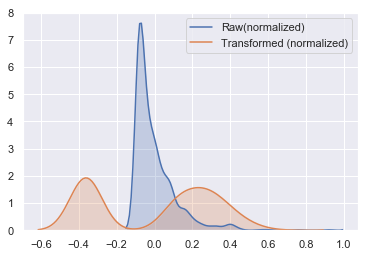

In [147]:
sns.kdeplot(x12, shade=True, label="Raw(normalized)");
sns.kdeplot(xt12, shade=True, label="Transformed (normalized)")

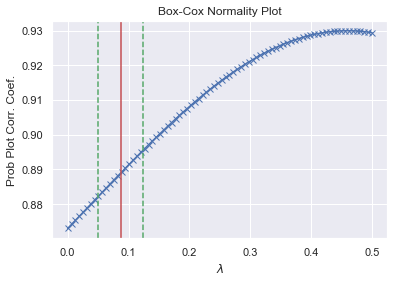

In [148]:
x = Target_train['TransactionsDebCash_Card']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, 0, 0.5, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


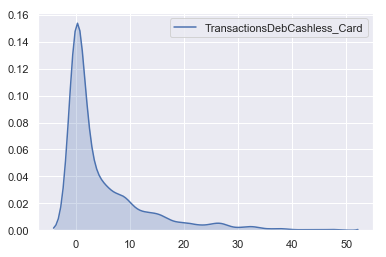

In [149]:
 # Box Cox for TransactionsDebCashless_Card
x13 = Target_train['TransactionsDebCashless_Card']
x13 = x13+0.01
# Get values from our "TransactionsDebCashless_Card"
transform = np.asarray(Target_train[['TransactionsDebCashless_Card']].values)
Target_train['TransactionsDebCashless_Card']
sns.kdeplot(x13,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [150]:
normtesttab(x13)

    Test_name          Statistic             p-value       
------------------ ------------------ ---------------------
D'Agostino-Pearson  452.6685004964047 5.061556062251233e-99
       Jarque-Bera 2006.5651751644389                   0.0


In [151]:
x13=x13+0.01
xt13, maxlog, interval = stats.boxcox(x13, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['TransactionsDebCashless_Card']=maxlog

lambda = 0.00131807


In [152]:
normtesttab(xt13)

    Test_name            Statistic            p-value      
------------------ --------------------- ------------------
D'Agostino-Pearson 0.0008551742495833206 0.9995725042775551
       Jarque-Bera    128.44621929056848                0.0


In [153]:
x13=(x13-x13.mean())/(x13.max()-x13.min())
xt13=(xt13-xt13.mean())/(xt13.max()-xt13.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


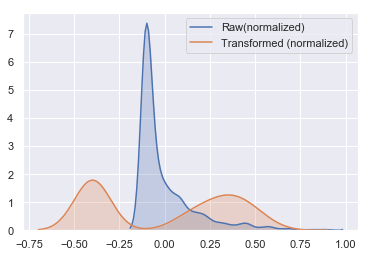

In [154]:
sns.kdeplot(x13, shade=True, label="Raw(normalized)");
sns.kdeplot(xt13, shade=True, label="Transformed (normalized)")

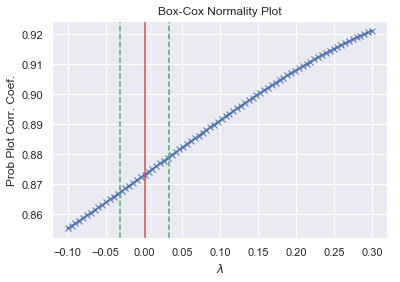

In [155]:
x = Target_train['TransactionsDebCash_Card']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, -0.1, 0.3, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


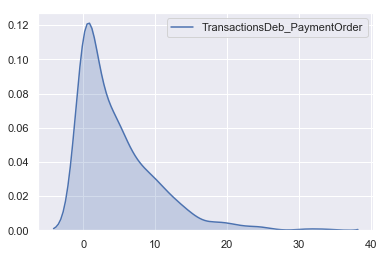

In [156]:
 # Box Cox for TransactionsDeb_PaymentOrder
x14 = Target_train['TransactionsDeb_PaymentOrder']
x14 = x14+0.01
# Get values from our "TransactionsDeb_PaymentOrder"
transform = np.asarray(Target_train[['TransactionsDeb_PaymentOrder']].values)
Target_train['TransactionsDeb_PaymentOrder']
sns.kdeplot(x14,shade=True)

def normtesttab(x):
    nm_value, nm_p = stats.normaltest(x)
    jb_value, jb_p = stats.jarque_bera(x)
    data_rows = [("D'Agostino-Pearson",nm_value,nm_p),
                ('Jarque-Bera', jb_value,jb_p)]
    t = Table(rows=data_rows, names=('Test_name','Statistic','p-value'),
             meta={'name': 'normal test table'},
        dtype=('S25','f8','f8'))
    print(t)

In [157]:
normtesttab(x14)

    Test_name          Statistic             p-value       
------------------ ------------------ ---------------------
D'Agostino-Pearson  342.1880216475521 4.952394271131309e-75
       Jarque-Bera 1120.0310183253173                   0.0


In [158]:
x14=x14+0.01
xt14, maxlog, interval = stats.boxcox(x14, alpha=0.05)
print("lambda = {:g}".format(maxlog))
la['TransactionsDeb_PaymentOrder']=maxlog

lambda = 0.247849


In [159]:
normtesttab(xt14)

    Test_name          Statistic             p-value        
------------------ ----------------- -----------------------
D'Agostino-Pearson 490.7496907341697 2.7230690822600895e-107
       Jarque-Bera 67.74643862912824  1.9984014443252818e-15


In [160]:
x14=(x14-x14.mean())/(x14.max()-x14.min())
xt14=(xt14-xt14.mean())/(xt14.max()-xt14.min())

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


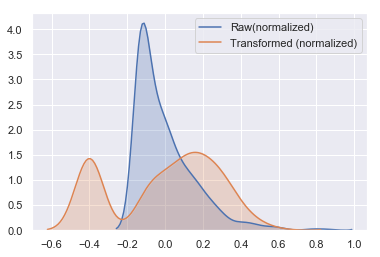

In [161]:
sns.kdeplot(x14, shade=True, label="Raw(normalized)");
sns.kdeplot(xt14, shade=True, label="Transformed (normalized)")

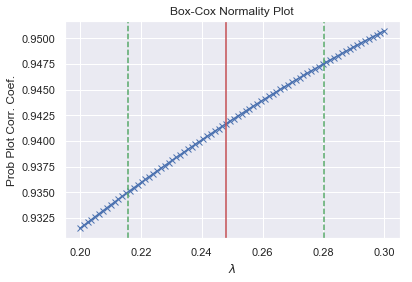

In [162]:
x = Target_train['TransactionsDeb_PaymentOrder']
x = x+0.01
fig = plt.figure()
ax = fig.add_subplot(111)
prob=stats.boxcox_normplot(x, 0.2, 0.3, plot=ax)
plt.plot(prob[0], prob[1], color='b')
ax.axvline(maxlog, color='r')
ax.axvline(interval[1], color='g', ls='--')
ax.axvline(interval[0], color='g',ls='--')
plt.show()

In [163]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0, class_weight=None, dual=False,)

In [164]:
# Transform
Ttrain=pd.DataFrame()
Ttrain['Sex']=Target_train['Sex']
Ttrain['Age']=Target_train['Age']
Ttrain['Tenure']=Target_train['Tenure']
Ttrain['Count_CA']= Target_train['Count_CA']
Ttrain['ActBal_CA']=np.log(Target_train['ActBal_CA']+la['ActBal_CA'])
Ttrain['VolumeCred']=np.log(Target_train['VolumeCred']+la['VolumeCred'])
Ttrain['VolumeCred_CA']=np.log(Target_train['VolumeCred_CA']+la['VolumeCred_CA'])
Ttrain['TransactionsCred']=np.log(Target_train['TransactionsCred']+la['TransactionsCred'])
Ttrain['TransactionsCred_CA']=np.log(Target_train['TransactionsCred_CA']+la['TransactionsCred_CA'])
Ttrain['VolumeDeb']=np.log(Target_train['VolumeDeb']+la['VolumeDeb'])
Ttrain['VolumeDeb_CA']=np.log(Target_train['VolumeDeb_CA']+la['VolumeDeb_CA'])
Ttrain['VolumeDebCash_Card']=np.log(Target_train['VolumeDebCash_Card']+la['VolumeDebCash_Card'])
Ttrain['VolumeDebCashless_Card']=np.log(Target_train['VolumeDebCashless_Card']+la['VolumeDebCashless_Card'])
Ttrain['VolumeDeb_PaymentOrder']=np.log(Target_train['VolumeDeb_PaymentOrder']+la['VolumeDeb_PaymentOrder'])
Ttrain['TransactionsDeb']=np.log(Target_train['TransactionsDeb']+la['TransactionsDeb'])
Ttrain['TransactionsDeb_CA']=np.log(Target_train['TransactionsDeb_CA']+la['TransactionsDeb_CA'])
Ttrain['TransactionsDebCash_Card']=np.log(Target_train['TransactionsDebCash_Card']+la['TransactionsDebCash_Card'])
Ttrain['TransactionsDebCashless_Card']=np.log(Target_train['TransactionsDebCashless_Card']+la['TransactionsDebCashless_Card'])
Ttrain['TransactionsDeb_PaymentOrder']=np.log(Target_train['TransactionsDeb_PaymentOrder']+la['TransactionsDeb_PaymentOrder'])


In [165]:
len(Ttrain.columns)

19

In [166]:
import pylab

In [167]:
# Before Transformation
def plt_trans(df):
    for i in range(len(df.columns)):
        plt.figure()
        stats.probplot(df.iloc[:,i], dist="norm", plot=pylab)
        plt.show()

In [168]:
# Before Transformation
def plt_trans():
    for i in range(len(Target_train.columns)):
        plt.figure()
        stats.probplot(Target_train.iloc[:,i], dist="norm", plot=pylab)
        plt.show()

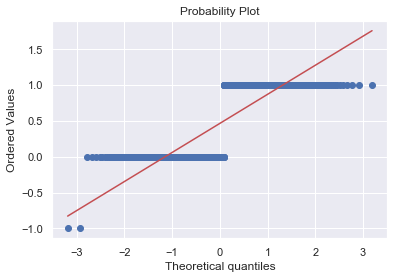

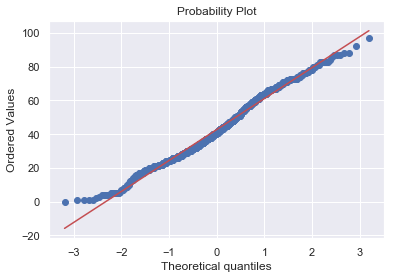

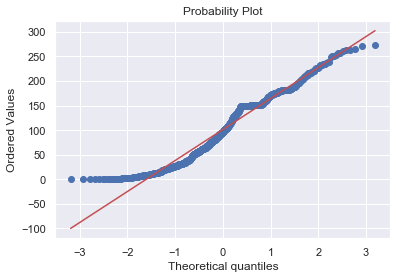

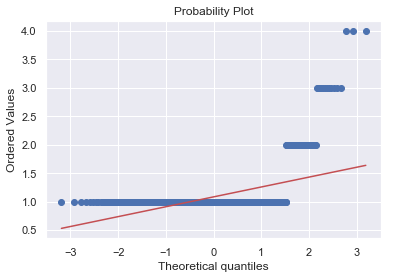

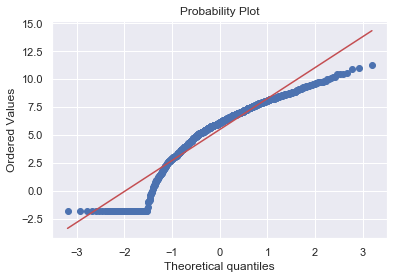

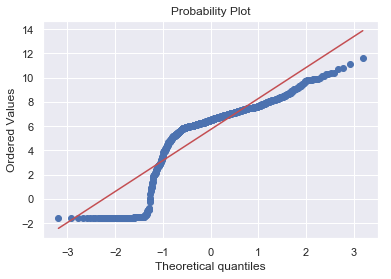

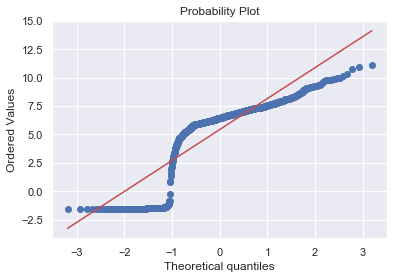

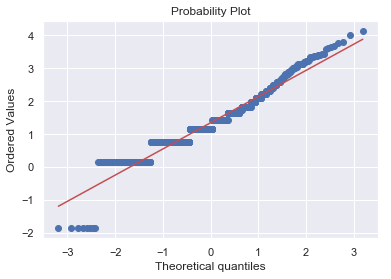

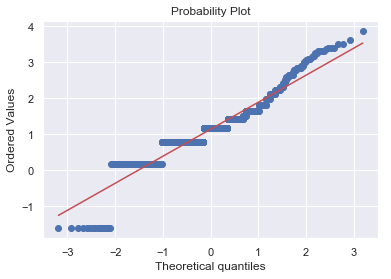

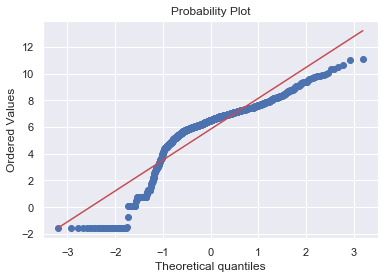

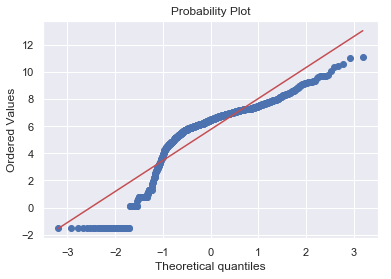

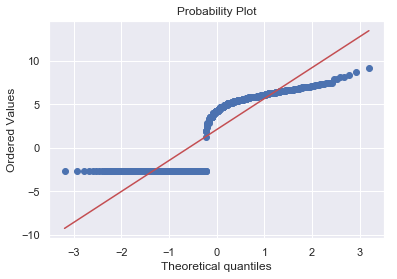

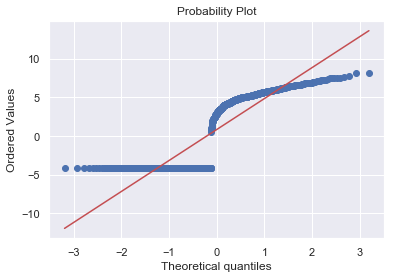

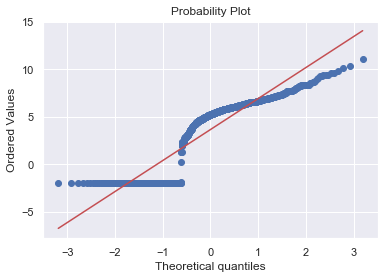

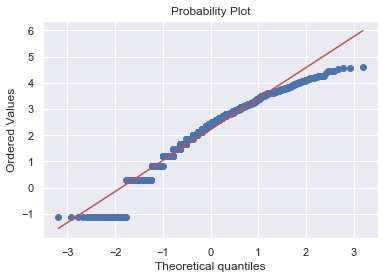

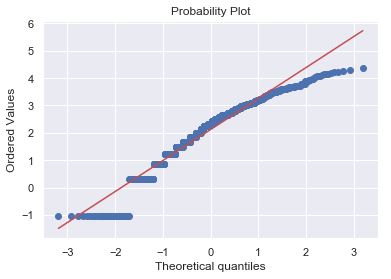

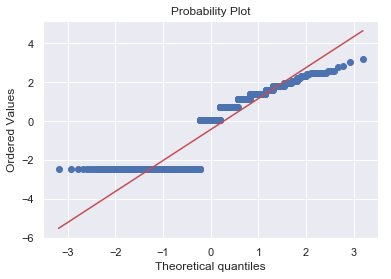

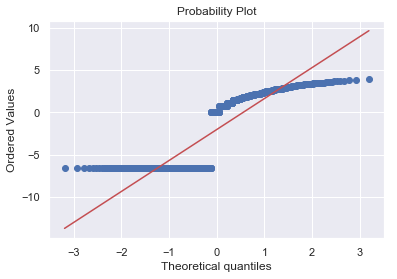

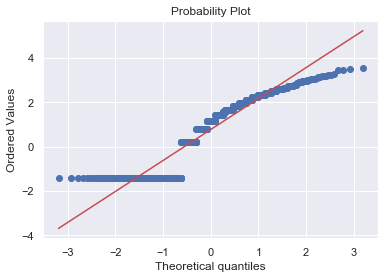

In [169]:
# After trainsformaiton
for i in range(len(Ttrain.columns)):
    plt.figure()
    stats.probplot(Ttrain.iloc[:,i], dist="norm", plot=pylab)
    plt.show()

In [170]:
Temp=pd.DataFrame()
Temp['Client']=Target_train['Client']
Temp['Sex']=Target_train['Sex']
Temp['Age']=Target_train['Age']
Temp['Tenure']=Target_train['Tenure']
Temp['Count_CA']=Target_train['Count_CA']
Temp['ActBal_CA']=xt15
Temp['VolumeCred']=xt1
Temp['VolumeCred_CA']=xt2
Temp['TransactionsCred']=xt3
Temp['TransactionsCred_CA']=xt4
Temp['VolumeDeb']=xt5
Temp['VolumeDeb_CA']=xt6
Temp['VolumeDebCash_Card']=xt7
Temp['VolumeDebCashless_Card']=xt8
Temp['VolumeDeb_PaymentOrder']=xt9
Temp['TransactionsDeb']=xt10
Temp['TransactionsDeb_CA']=xt11
Temp['TransactionsDebCash_Card']=xt12
Temp['TransactionsDebCashless_Card']=xt13
Temp['TransactionsDeb_PaymentOrder']=xt14
Temp[['Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL']]=Target_train[['Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL']]

In [171]:
def plot_corr(df,size=10):
    sns.set(style="white")
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(size, size-2))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [172]:
Temp.iloc[:,6:20].corr()

,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
VolumeCred,1.000000,0.965011,0.666358,0.633517,0.817869,0.799880,0.374316,0.415362,0.667148,0.637700,0.617570,0.329942,0.394919,0.617430
VolumeCred_CA,0.965011,1.000000,0.618150,0.652952,0.798785,0.793374,0.391116,0.427875,0.670493,0.650228,0.651064,0.350564,0.411187,0.630419
TransactionsCred,0.666358,0.618150,1.000000,0.895421,0.592728,0.553598,0.318736,0.371834,0.491036,0.660013,0.552196,0.315885,0.368589,0.523368
TransactionsCred_CA,0.633517,0.652952,0.895421,1.000000,0.578173,0.561516,0.338349,0.377355,0.493347,0.652464,0.604039,0.343645,0.379964,0.527543
VolumeDeb,0.817869,0.798785,0.592728,0.578173,1.000000,0.984307,0.459814,0.492780,0.745899,0.760901,0.741010,0.407986,0.466430,0.676533
VolumeDeb_CA,0.799880,0.793374,0.553598,0.561516,0.984307,1.000000,0.459496,0.492562,0.753409,0.748207,0.750384,0.404780,0.465739,0.681220
VolumeDebCash_Card,0.374316,0.391116,0.318736,0.338349,0.459814,0.459496,1.000000,0.444957,0.252282,0.575247,0.581435,0.961096,0.456327,0.308686
VolumeDebCashless_Card,0.415362,0.427875,0.371834,0.377355,0.492780,0.492562,0.444957,1.000000,0.369021,0.704524,0.718834,0.471825,0.982597,0.416339
VolumeDeb_PaymentOrder,0.667148,0.670493,0.491036,0.493347,0.745899,0.753409,0.252282,0.369021,1.000000,0.616285,0.627212,0.210308,0.351069,0.925676
TransactionsDeb,0.637700,0.650228,0.660013,0.652464,0.760901,0.748207,0.575247,0.704524,0.616285,1.000000,0.966048,0.605840,0.730575,0.694464


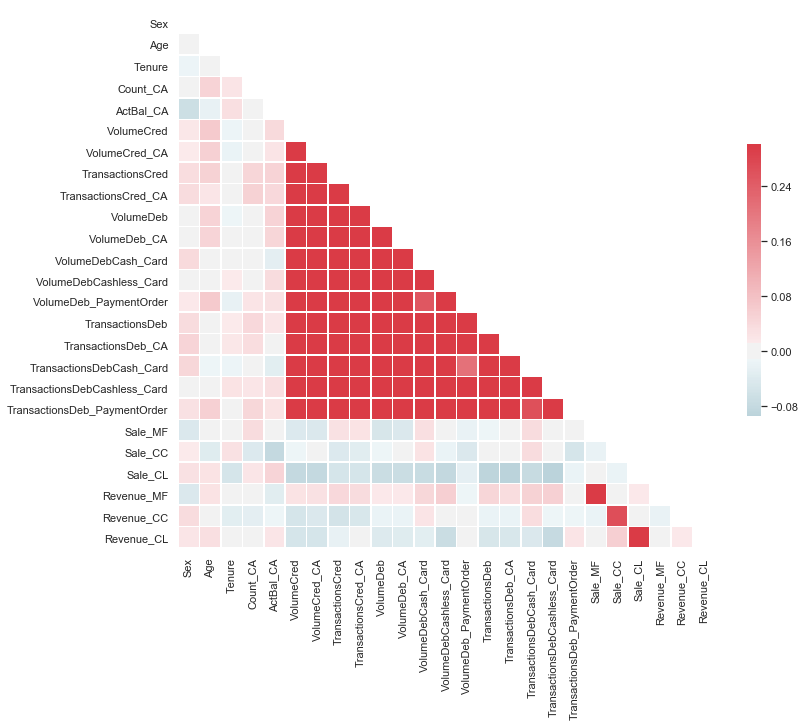

In [173]:
plot_corr(Temp.iloc[:,1:],size=12)

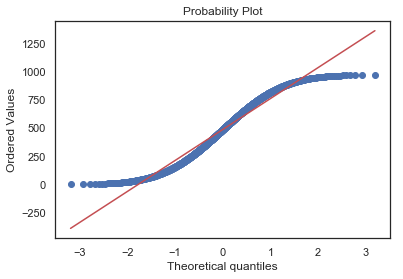

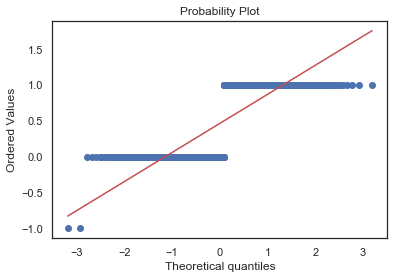

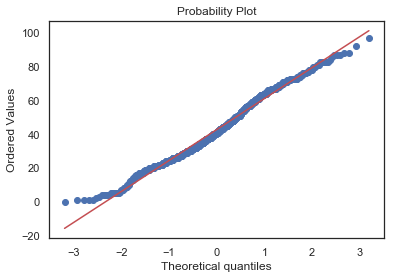

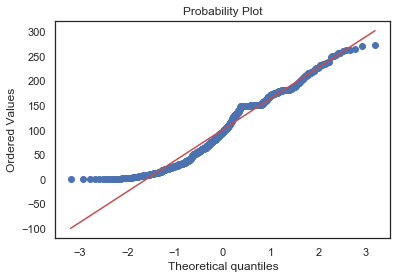

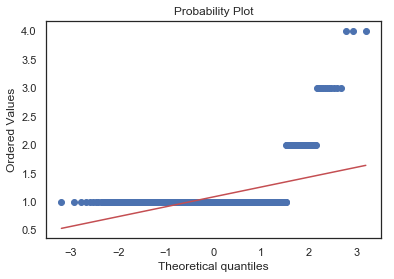

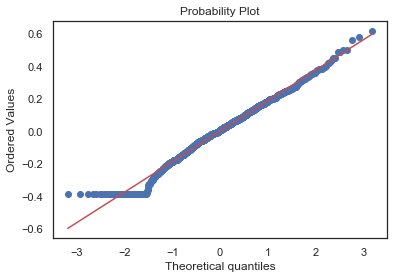

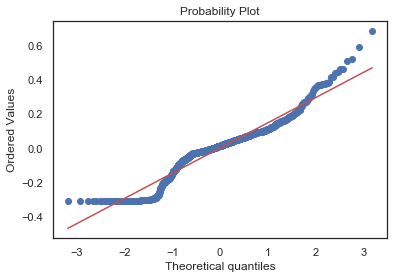

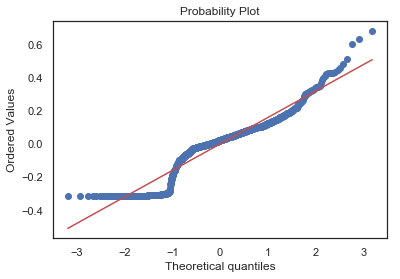

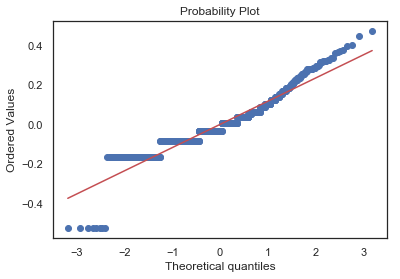

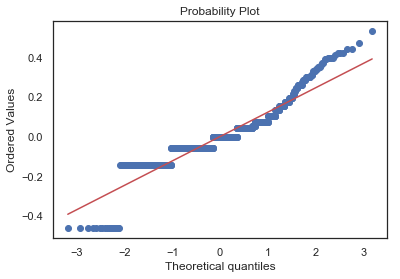

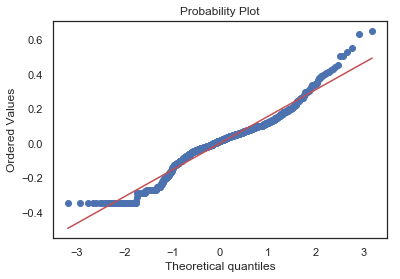

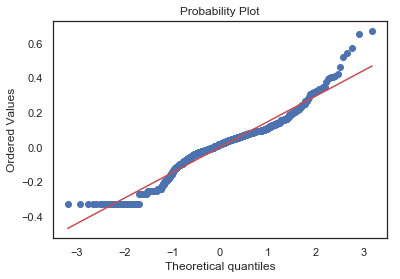

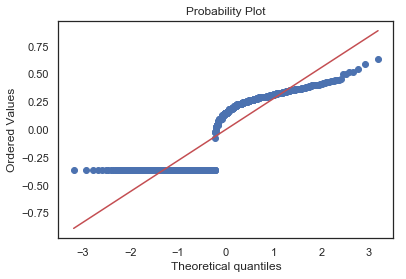

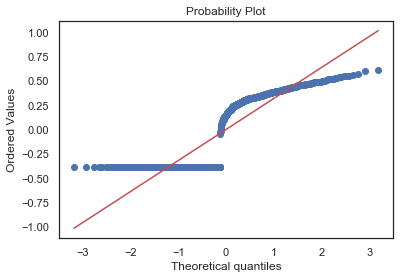

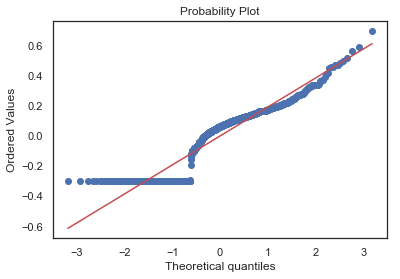

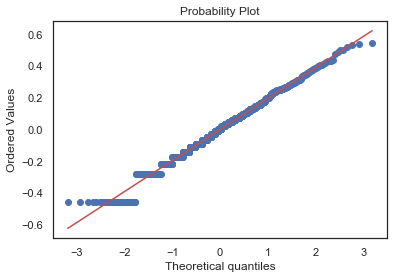

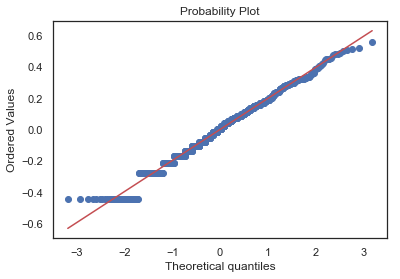

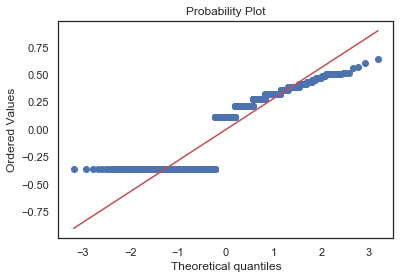

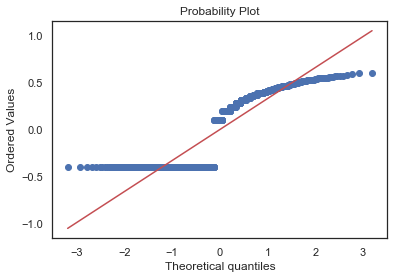

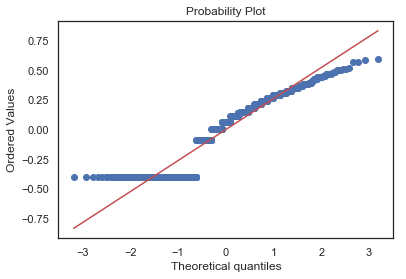

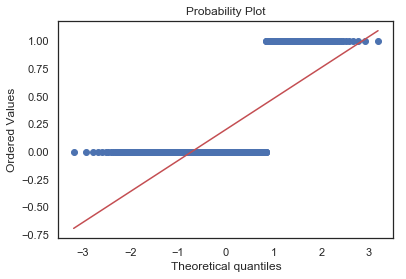

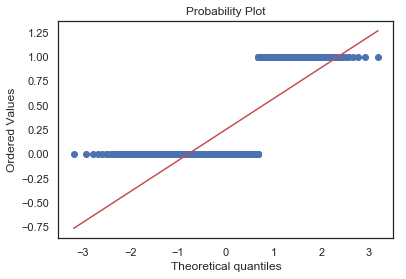

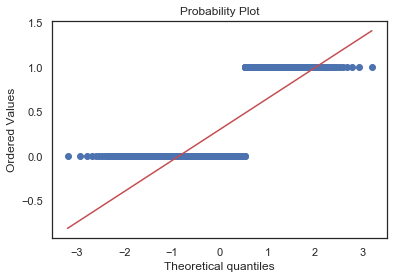

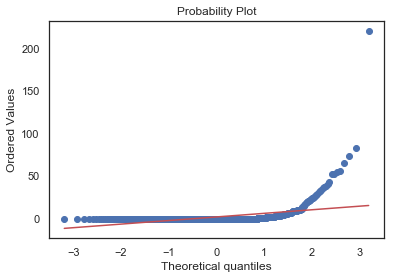

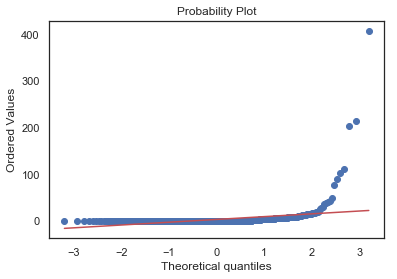

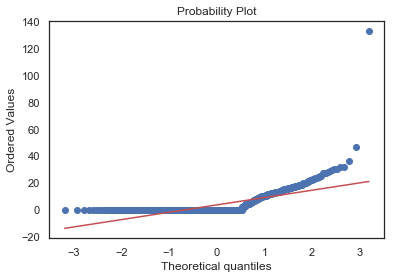

In [174]:
for i in range(len(Temp.columns)):
    plt.figure()
    stats.probplot(Temp.iloc[:,i], dist="norm", plot=pylab)
    plt.show()

In [175]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [176]:
unwanted=['Client','Sale_MF','Sale_CC','Sale_CL','Revenue_MF','Revenue_CC','Revenue_CL',"VolumeCred_CA","VolumeDeb","VolumeDeb_CA","TransactionsDeb","TransactionsCred_CA","TransactionsDebCash_Card","TransactionsDeb_CA","TransactionsDebCashless_Card","TransactionsDeb_PaymentOrder"]
features = [e for e in features if e not in unwanted]
x=Temp[features]
y=Temp[['Sale_MF','Sale_CC','Sale_CL']]

In [177]:
# Split data in train and test(80% of data for training and 20% for testing).
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [178]:
# Oversampling for features and target variable Sale_MF
sm = SMOTE(random_state=42, ratio=1.0)
os_x_train, os_y_train=sm.fit_sample(x_train,y_train['Sale_MF'])
print(y_train['Sale_MF'].value_counts(),np.bincount(os_y_train))

0    622
1    153
Name: Sale_MF, dtype: int64 [622 622]


In [179]:
os_x_train= np.asmatrix(os_x_train)
x_test=np.asmatrix(x_test)

In [180]:
from sklearn.linear_model import LogisticRegression
name = Target_train[features].columns
lr = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr.fit(os_x_train, os_y_train)
y_pred= lr.predict(x_test)

In [181]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, os_x_train, os_y_train, cv=3, scoring="accuracy"))

[0.53846154 0.52415459 0.51690821]


In [182]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test['Sale_MF'], y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[76 78]
 [15 25]]


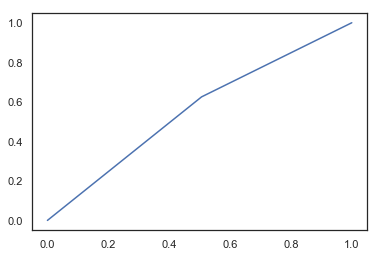

In [183]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test['Sale_MF'], y_pred)
plt.plot(fpr, tpr)
plt.show()

In [184]:
from sklearn.metrics import recall_score
recall = recall_score(y_test['Sale_MF'], y_pred)
print("Recall Rate:", recall)

Recall Rate: 0.625


In [185]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test['Sale_MF'], y_pred)
print("Accuracy Rate:", accuracy)

Accuracy Rate: 0.520618556701031


In [186]:
from sklearn.metrics import roc_auc_score
print('Area under the curve:', roc_auc_score(y_test['Sale_MF'],y_pred))

Area under the curve: 0.5592532467532468


In [187]:
result['Sex']=result['Sex'].map({'F':1,'M':0})

In [188]:
result.isnull().sum()

Client                            0
Sex                               1
Age                               0
Tenure                            0
Count_CA                          0
Count_SA                        485
Count_MF                        524
Count_OVD                       478
Count_CC                        586
Count_CL                        590
ActBal_CA                         0
ActBal_SA                       485
ActBal_MF                       524
ActBal_OVD                      478
ActBal_CC                       586
ActBal_CL                       590
VolumeCred                       10
VolumeCred_CA                    10
TransactionsCred                 10
TransactionsCred_CA              10
VolumeDeb                        10
VolumeDeb_CA                     10
VolumeDebCash_Card               10
VolumeDebCashless_Card           10
VolumeDeb_PaymentOrder           10
TransactionsDeb                  10
TransactionsDeb_CA               10
TransactionsDebCash_Card    

In [189]:
result=result[["Client","Sex","Age","Tenure","Count_CA","ActBal_CA","VolumeCred","TransactionsCred","VolumeDebCash_Card","VolumeDebCashless_Card","VolumeDeb_PaymentOrder"]]
result.isnull().sum()

Client                     0
Sex                        1
Age                        0
Tenure                     0
Count_CA                   0
ActBal_CA                  0
VolumeCred                10
TransactionsCred          10
VolumeDebCash_Card        10
VolumeDebCashless_Card    10
VolumeDeb_PaymentOrder    10
dtype: int64

In [190]:
result[result["Sex"]<0]

,Client,Sex,Age,Tenure,Count_CA,ActBal_CA,VolumeCred,TransactionsCred,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder


In [191]:
def cov_mis(df):
    features = ["Age","Tenure","Count_CA","ActBal_CA","VolumeCred","TransactionsCred","VolumeDebCash_Card","VolumeDebCashless_Card","VolumeDeb_PaymentOrder"]
    mean = np.mean(pd_new[features],axis=0)
    for i, v in enumerate(features):
        df[v]=pd_new[v].replace(np.NaN, mean[i])

In [192]:
cov_mis(result)
result.isnull().sum()

Client                    0
Sex                       1
Age                       0
Tenure                    0
Count_CA                  0
ActBal_CA                 0
VolumeCred                0
TransactionsCred          0
VolumeDebCash_Card        0
VolumeDebCashless_Card    0
VolumeDeb_PaymentOrder    0
dtype: int64

In [193]:
result['Sex']=result['Sex'].isnull().sum()

In [194]:
result.isnull().sum()

Client                    0
Sex                       0
Age                       0
Tenure                    0
Count_CA                  0
ActBal_CA                 0
VolumeCred                0
TransactionsCred          0
VolumeDebCash_Card        0
VolumeDebCashless_Card    0
VolumeDeb_PaymentOrder    0
dtype: int64

In [195]:
# Logistic Regression Model
result_new=np.asmatrix(result.iloc[:,1:])
y_pred_new = lr.predict(result_new)
np.count_nonzero(y_pred_new == 1), np.count_nonzero(y_pred_new == 0)
# Probability
probablity = lr.predict_proba(result_new)
list_pro = []
for i in range(probablity.shape[0]):
    pro = max(list(probablity[i]))
    list_pro.append(pro)
# Output result and index to csv
index = np.array(result['Client']).reshape((-1,1))[:,0:1]
output = pd.DataFrame(np.column_stack((index.reshape(-1,1),np.array(y_pred_new).reshape(-1,1),np.array(list_pro).reshape(-1,1))),columns=['Client','predict_lable','probablity'])
output.to_csv('/Users/leono1/Desktop/result/lr_result_MF.csv',index=False, header=True,encoding='gbk')

In [196]:
result_new.shape

(646, 10)

In [197]:
# Oversampling for features and target variable Sale_MF
sm = SMOTE(random_state=42, ratio=1.0)
os_x_train, os_y_train=sm.fit_sample(x_train,y_train['Sale_CC'])
print(y_train['Sale_CC'].value_counts(),np.bincount(os_y_train))
os_x_train= np.asmatrix(os_x_train)
x_test=np.asmatrix(x_test)

0    582
1    193
Name: Sale_CC, dtype: int64 [582 582]


In [198]:
lr.fit(os_x_train, os_y_train)
y_pred= lr.predict(x_test)

In [199]:
result.columns

Index(['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'ActBal_CA', 'VolumeCred',
       'TransactionsCred', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder'],
      dtype='object')

In [200]:
result=result.iloc[:,0:20]
result.head()

,Client,Sex,Age,Tenure,Count_CA,ActBal_CA,VolumeCred,TransactionsCred,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder
2,3,1,17,140,1,482.654643,1607.149643,4.0,0.000000,112.857143,10.678571
3,4,1,24,153,1,1599.840714,1872.483571,9.0,714.285714,526.037500,1963.165357
4,5,1,58,200,1,5353.483929,4372.773929,23.0,157.142857,832.175000,1779.571429
6,7,1,55,227,1,879.685000,387.504643,2.0,17.857143,69.151071,10.714286
8,9,1,33,182,1,510.166429,527.175000,6.0,53.571429,0.000000,170.714286


In [201]:
result1=result[["Client","Sex","Age","Tenure","Count_CA","ActBal_CA","VolumeCred","TransactionsCred","VolumeDebCash_Card","VolumeDebCashless_Card","VolumeDeb_PaymentOrder"]]

In [202]:
result1=result[["Client","Sex","Age","Tenure","Count_CA","ActBal_CA","VolumeCred","TransactionsCred","VolumeDebCash_Card","VolumeDebCashless_Card","VolumeDeb_PaymentOrder"]]
# Logistic Regression Model
result_new=np.asmatrix(result1.iloc[:,1:])
y_pred_new = lr.predict(result_new)
np.count_nonzero(y_pred_new == 1), np.count_nonzero(y_pred_new == 0)
# Probability
probablity = lr.predict_proba(result_new)
# list_pro = []
# for i in range(probablity.shape[0]):
#     pro = max(list(probablity[i]))
#     list_pro.append(pro)
# Output result and index to csv
index = np.array(result['Client']).reshape((-1,1))[:,0:1]
output = pd.DataFrame(np.column_stack((index.reshape(-1,1),np.array(y_pred_new).reshape(-1,1),np.array(probablity[:,0]).reshape(-1,1))),columns=['Client','predict_lable','probablity'])
output.to_csv('/Users/leono1/Desktop/result/lr_result_CC.csv',index=False, header=True,encoding='gbk')

In [203]:
# Probability
probablity = lr.predict_proba(result_new)
list_pro = []
for i in range(probablity.shape[0]):
    pro = max(list(probablity[i]))
    list_pro.append(pro)

In [204]:
pd.DataFrame(probablity).describe()

,0,1
count,646.000000,646.000000
mean,0.452779,0.547221
std,0.496490,0.496490
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [205]:
a=pd.Series(list_pro)
a.describe()

count    646.000000
mean       0.997646
std        0.026468
min        0.646111
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

In [206]:
# Output result and index to csv
index = np.array(result['Client']).reshape((-1,1))[:,0:1]
output = pd.DataFrame(np.column_stack((index.reshape(-1,1),np.array(y_pred_new).reshape(-1,1),np.array(list_pro).reshape(-1,1))),columns=['Client','predict_lable','probablity'])
output.to_csv('/Users/leono1/Desktop/result/lr_result2.csv',index=False, header=True,encoding='gbk')

In [207]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, os_x_train, os_y_train, cv=3, scoring="accuracy"))

[0.52835052 0.54639175 0.59020619]


In [208]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test['Sale_CC'], y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[80 65]
 [24 25]]


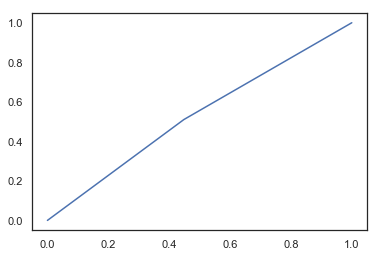

In [209]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test['Sale_CC'], y_pred)
plt.plot(fpr, tpr)
plt.show()

In [210]:
from sklearn.metrics import recall_score
recall = recall_score(y_test['Sale_CC'], y_pred)
print("Recall Rate:", recall)

Recall Rate: 0.5102040816326531


In [211]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test['Sale_CC'], y_pred)
print("Accuracy Rate:", accuracy)

Accuracy Rate: 0.5412371134020618


In [212]:
from sklearn.metrics import roc_auc_score
print('Area under the curve:', roc_auc_score(y_test['Sale_CC'],y_pred))

Area under the curve: 0.5309641097818437


In [213]:
# Logistic Regression Model
result_new=np.asmatrix(result1.iloc[:,1:])
y_pred_new = lr.predict(result_new)
np.count_nonzero(y_pred_new == 1), np.count_nonzero(y_pred_new == 0)

(352, 294)

In [214]:
# Oversampling for features and target variable Sale_MF
sm = SMOTE(random_state=42, ratio=1.0)
os_x_train, os_y_train=sm.fit_sample(x_train,y_train['Sale_CL'])
print(y_train['Sale_CL'].value_counts(),np.bincount(os_y_train))
os_x_train= np.asmatrix(os_x_train)
x_test=np.asmatrix(x_test)

0    539
1    236
Name: Sale_CL, dtype: int64 [539 539]


In [215]:
lr.fit(os_x_train, os_y_train)
y_pred= lr.predict(x_test)

In [216]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, os_x_train, os_y_train, cv=3, scoring="accuracy"))

[0.53333333 0.56111111 0.53072626]


In [217]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test['Sale_CL'], y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[84 56]
 [26 28]]


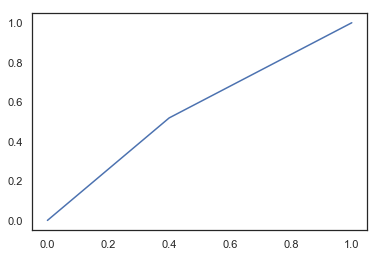

In [218]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test['Sale_CL'], y_pred)
plt.plot(fpr, tpr)
plt.show()

In [219]:
from sklearn.metrics import recall_score
recall = recall_score(y_test['Sale_CL'], y_pred)
print("Recall Rate:", recall)

Recall Rate: 0.5185185185185185


In [220]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test['Sale_CL'], y_pred)
print("Accuracy Rate:", accuracy)

Accuracy Rate: 0.5773195876288659


In [221]:
from sklearn.metrics import roc_auc_score
print('Area under the curve:', roc_auc_score(y_test['Sale_CL'],y_pred))

Area under the curve: 0.5592592592592592


In [222]:
#Sort the dataframe by clients
df1=df1.sort_values(by=['Client'])
df2=df2.sort_values(by=['Client'])
df3=df3.sort_values(by=['Client'])
df4=df4.sort_values(by=['Client'])
left=pd.merge(df1, df2, how='left',on=['Client'] )
right=pd.merge(df3, df4, how='left',on=['Client'] )
pd_new=pd.merge(left,right,how='left',on=['Client'])
Target_right=pd.merge(df3,df4,how='right',on=['Client'])
# 60% of the 1615 clients in the data and it will be used for training models
Target_train=pd.merge(left,Target_right,how='right',on=['Client'])
# Try add back attributes in products_actbalance sheet.
Temp['Count_SA']=Target_train['Count_SA']

In [223]:
mean=np.mean(Target_train['Count_SA'])
Temp['Count_SA']=Target_train['Count_SA'].replace(np.NaN, -1)

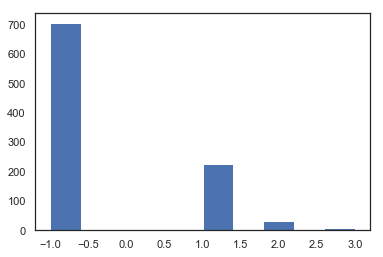

In [224]:
# plot a 100 bin histogram of the "Count_SA" column
plt.hist(Temp['Count_SA'], bins=10)
plt.show()

In [225]:
col = ['Count_SA']
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler() 
Temp[col] =sc.fit_transform(Temp[col])

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [227]:
sm = SMOTE(random_state=42, ratio=1.0)
os_x_train, os_y_train=sm.fit_sample(x_train,y_train['Sale_CL'])
print(y_train['Sale_CL'].value_counts(),np.bincount(os_y_train))
os_x_train= np.asmatrix(os_x_train)
x_test=np.asmatrix(x_test)

0    533
1    242
Name: Sale_CL, dtype: int64 [533 533]


In [228]:
lr.fit(os_x_train, os_y_train)
y_pred= lr.predict(x_test)

In [229]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr, os_x_train, os_y_train, cv=3, scoring="accuracy"))

[0.55337079 0.55617978 0.57909605]


In [230]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test['Sale_CL'], y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[81 65]
 [23 25]]


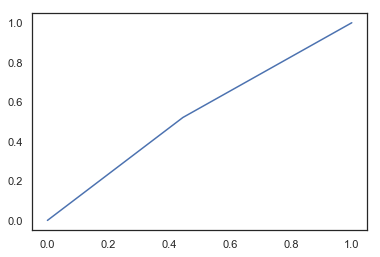

In [231]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test['Sale_CL'], y_pred)
plt.plot(fpr, tpr)
plt.show()

In [232]:
from sklearn.metrics import recall_score
recall = recall_score(y_test['Sale_CL'], y_pred)
print("Recall Rate:", recall)

Recall Rate: 0.5208333333333334


In [233]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test['Sale_CL'], y_pred)
print("Accuracy Rate:", accuracy)

Accuracy Rate: 0.5463917525773195


In [234]:
from sklearn.metrics import roc_auc_score
print('Area under the curve:', roc_auc_score(y_test['Sale_CL'],y_pred))

Area under the curve: 0.5378139269406393


In [235]:
result1=result[["Client","Sex","Age","Tenure","Count_CA","ActBal_CA","VolumeCred","TransactionsCred","VolumeDebCash_Card","VolumeDebCashless_Card","VolumeDeb_PaymentOrder"]]
# Logistic Regression Model
result_new=np.asmatrix(result1.iloc[:,1:])
y_pred_new = lr.predict(result_new)
np.count_nonzero(y_pred_new == 1), np.count_nonzero(y_pred_new == 0)
# Probability
probablity = lr.predict_proba(result_new)
list_pro = []
for i in range(probablity.shape[0]):
    pro = max(list(probablity[i]))
    list_pro.append(pro)
# Output result and index to csv
index = np.array(result['Client']).reshape((-1,1))[:,0:1]
output = pd.DataFrame(np.column_stack((index.reshape(-1,1),np.array(y_pred_new).reshape(-1,1),np.array(list_pro).reshape(-1,1))),columns=['Client','predict_lable','probablity'])
output.to_csv('/Users/leono1/Desktop/result/lr_result_CL.csv',index=False, header=True,encoding='gbk')